In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

# 10. Deep MNIST

## Specification

#### Architecture

* Convolution (32 of 3x3 filters, same padding, stride=1)
* ReLU
* Convolution (32 of 3x3 filters, same padding, stride=1)
* ReLU
* MaxPooling (2x2)
* Convolution (64 of 3x3 filters, same padding, stride=1)
* ReLU
* Convolution (64 of 3x3 filters, same padding, stride=1)
* ReLU
* MaxPooling (2x2)
* Dense (256 neurons)
* BatchNorm
* ReLU
* Dropout(keep_prob=0.5)
* Dense (128 neurons)
* BatchNorm
* ReLU
* Dropout(keep_prob=0.5)
* Dense (10 neurons)
* Softmax

He initialization for all the conv and dense layers

#### Training

* Epochs: 30
* Mini batch size: 100
* Optimizer: Adam(learning_rate=0.001, beta1=0.9, beta2=0.999)
* Data Augmentation: Rotation: $\pm 15$&deg;, X and Y shift: $\pm 2$px

## Ensemble Learning on AWS

![EC2 Console](assets/10_deep_conv_net/ec2_console.png)

I used EC2 by Amazon Web Service to train ten networks. The training for 30 epochs took about 13.5 hours on c5.xlarge instance. The c5 instances only have CPUs. The total cost was about \$9 (10 instances $\times$ 13.5 hours $\times$ \$0.063/hour/instance.) Using Spot Instance is a good way to save: \$0.17/hour/instance (On-demand) vs \$0.063/hour/instance (Spot).

## Accuracy during training

In [16]:
plt.rcParams['figure.figsize'] = [16, 18]

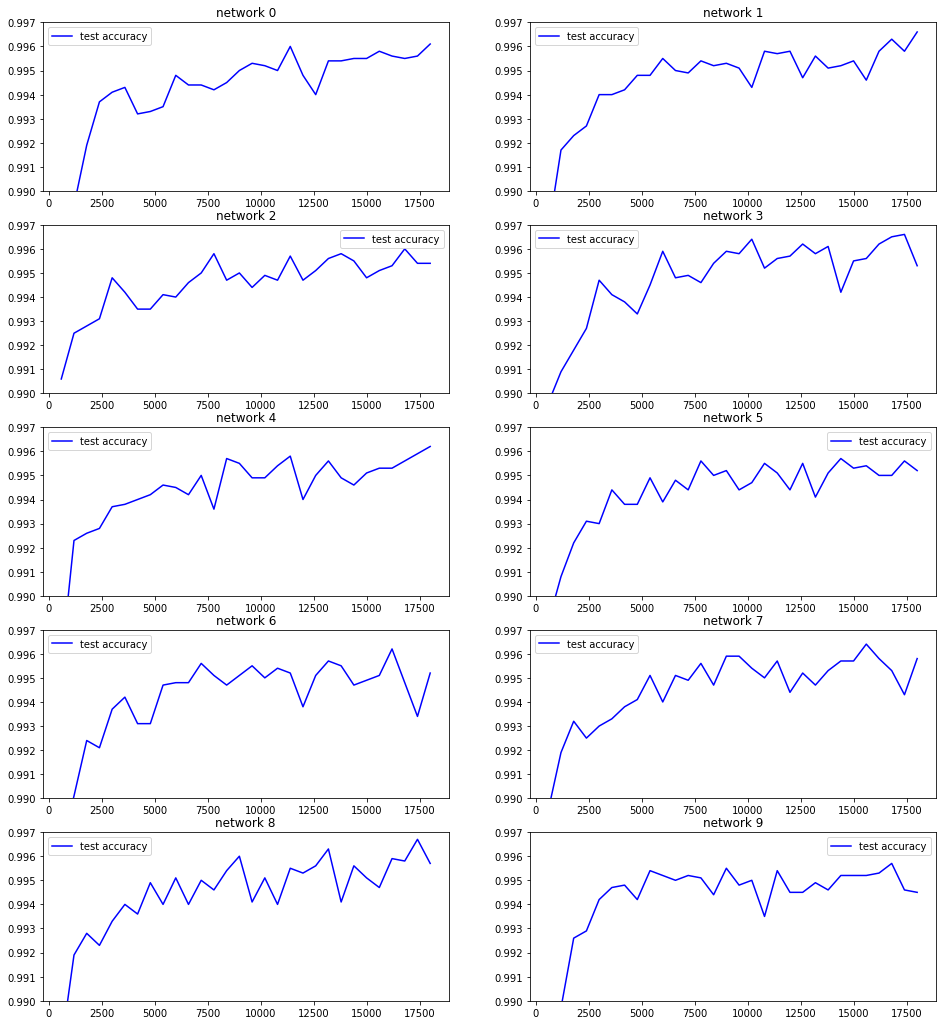

In [24]:
fig, axes = plt.subplots(5, 2)

for row in range(5):
    for col in range(2):
        index = row * 2 + col
        
        log = pickle.load(open('code/10_deep_conv_net/log/deep_conv_solo_{}_log.pkl'.format(index), "rb"))

        current = axes[row, col]
        current.plot(log['iterations'], log['accuracy'], 'b', label='test accuracy')
        current.legend()
        current.set_title('network {}'.format(index))
        current.set_ylim([0.99, 0.997])

plt.show()

## Accuracy with Ensemble

In [26]:
plt.rcParams['figure.figsize'] = [18.0, 4.0]

0.9961
0.9966
0.9954
0.9953
0.9962
0.9952
0.9952
0.9958
0.9957
0.9945
----
0.9961
0.9972
0.9972
0.9968
0.997
0.9969
0.9969
0.9967
0.9969
0.9968


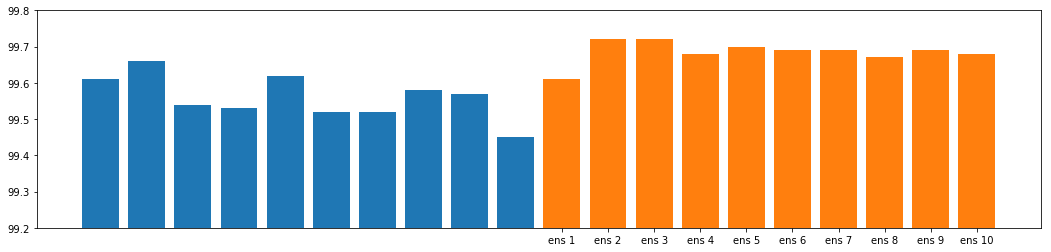

In [46]:
acc_solo = []
labels_solo = []
x_solo = []

for i in range(10):
    a = pickle.load(open('code/10_deep_conv_net/log/deep_conv_solo_{}_log.pkl'.format(i), "rb"))['test_acc']
    acc_solo.append(a * 100)
    print(a)
    labels_solo.append("s{}".format(i))
    x_solo.append(i)
print('----')
acc_ens = []
labels_ens = []
x_ens = []

for i in range(1,11):
    a = pickle.load(open('code/10_deep_conv_net/log/deep_conv_ensemble_{}_log.pkl'.format(i), "rb"))['test_acc']
    print(a)
    acc_ens.append(a * 100)
    labels_ens.append("ens {}".format(i))
    x_ens.append(9 + i)

plt.bar(x_solo, acc_solo, tick_label=labels_solo)
plt.bar(x_ens, acc_ens, tick_label=labels_ens)
plt.ylim(99.2, 99.8)
plt.show()

## Conclusion

I implemented the deep network for MNIST dataset from scratch, and the network achieves 99.72% test accuracy.

## Future Work

Error Analysis

Ensemble with top-performing networks